### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
Twitter_df = pd.read_csv("Twitter.data", sep
                             = ',', header = None)

In [ ]:
Twitter_df.rename(index = str, columns = {0: 'NCD_0', 1: 'NCD_1', 2: 'NCD_2', 3: 'NCD_3', 4: 'NCD_4', 5: 'NCD_5', 6: 'NCD_6 ',
                              7: 'AI_0', 8: 'AI_1', 9:'AI_2', 10: 'AI_3', 11: 'AI_4', 12: 'AI_5', 13: 'AI_6', 14: 'AS(NA)_0',
                              15: 'AS(NA)_1', 16: 'AS(NA)_2', 17: 'AS(NA)_3', 18:'AS(NA)_4', 19: 'AS(NA)_5', 20: 'AS(NA)_6', 21: 'BL_0',
                              22: 'BL_1', 23: 'BL_2', 24: 'BL_3', 25: 'BL_4', 26: 'BL_5', 27: 'BL_6', 28: 'NAC_0', 29: 'NAC_1', 30: 'NAC_2',
                              31: 'NAC_3', 32: 'NAC_4', 33: 'NAC_5', 34: 'NAC_6', 35: 'AS(NAC)_0', 36: 'AS(NAC)_1', 37: 'AS(NAC)_2', 38: 'AS(NAC)_3',
                              39: 'AS(NAC)_4', 40: 'AS(NAC)_5', 41: 'AS(NAC)_6', 42: 'CS_0', 43:'CS_1', 44:'CS_2', 45:'CS_3', 46:'CS_4',47:'CS_5',48:'CS_6', 
                                            49:'AT_0',50:'AT_1',51:'AT_2',52:'AT_3',53:'AT_4',54:'AT_5',55:'AT_6',56:'NA_0',57:'NA_1',58:'NA_2',59:'NA_3',60:'NA_4',
                                            61:'NA_5',62:'NA_6',63:'ADL_0', 64:'ADL_1', 65:'ADL_2', 66:'ADL_3', 67:'ADL_4', 68:'ADL_5', 69:'ADL_6', 70:'NAD_0', 71:'NAD_1', 
                                            72:'NAD_2', 73:'NAD_3', 74:'NAD_4', 75:'NAD_5', 76:'NAD_6', 77: 'buzz'}, inplace = True)

In [ ]:
Twitter_df.describe()

In [ ]:
Twitter_df.columns

In [ ]:
Twitter_df.info()


In [ ]:
#Info shows no null values present in the data

In [ ]:
Twitter_df.head()

In [ ]:
#Twitter_df_sample = Twitter_df.sample(frac=0.001, replace=True)

In [ ]:

from sklearn.model_selection import train_test_split
X = Twitter_df.loc[:, Twitter_df.columns != 'buzz']
y = Twitter_df[['buzz']]
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.001)
#print(sample_data.shape,sample_target.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0, test_size = 0.2)
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
#Knn
knn = KNeighborsRegressor()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='r2')
grid_knn.fit(X_train, y_train)
grid_knn.score(X_train, y_train)
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)
report_table = [['knn', grid_knn.best_params_, grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test), r2_score(y_knn_train_predict, y_train), r2_score(y_knn_predict, y_test) ]]

In [ ]:
grid_knn.score(X_test, y_test)

In [ ]:
grid_knn.best_params_

In [ ]:
grid_knn.cv_results_['mean_test_score']

In [ ]:
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)

In [ ]:
print('Train r2_score: %.2f'%r2_score(y_knn_train_predict, y_train))
print('Test r2_score: %.2f '%r2_score(y_knn_predict, y_test))

In [ ]:
report_table = [['knn', grid_knn.best_params_ , grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test), r2_score(y_knn_train_predict, y_train), r2_score(y_knn_predict, y_test) ]]

In [ ]:
#report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train r2 score', 'Test r2 score'])

In [ ]:
#report.index = report['Model name']

In [ ]:
#report

In [ ]:
#Linearregression
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
#print(lreg.score(X_train, y_train))
#print(lreg.score(X_test, y_test))
y_linear_predict = lreg.predict(X_test)
y_linear_train_predict = lreg.predict(X_train)
report_table = [['linear', 'None', lreg.score(X_train, y_train), lreg.score(X_test, y_test), r2_score(y_linear_train_predict, y_train), r2_score(y_linear_predict, y_test)]]
#report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train r2 score', 'Test r2 score'])
#report

In [ ]:
#Ridge Regression
from  sklearn.linear_model import Ridge
params={'alpha': [0.01, 0.1, 1, 10, 100]}
rdg_reg = Ridge()
grid_ridge = GridSearchCV(rdg_reg,params,cv=5, scoring = 'r2')
grid_ridge.fit(X_train, y_train)
grid_ridge.score(X_train, y_train)
y_ridge_predict = grid_ridge.predict(X_test)
y_ridge_train_predict = grid_ridge.predict(X_train)
report_table = report_table + [['Ridge', grid_ridge.best_params_, grid_ridge.score(X_train, y_train), grid_ridge.score(X_test, y_test), r2_score(y_ridge_train_predict, y_train), r2_score(y_ridge_predict, y_test)]]
report_table

In [ ]:
import matplotlib.pyplot as plt
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [ ]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [ ]:
ridge.coef_

In [ ]:
ridge.intercept_

In [ ]:
#Lasso Regression
from  sklearn.linear_model import Lasso
params={'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_reg = Lasso()
grid_lasso = GridSearchCV(lasso_reg,params,cv=5, scoring = 'r2')
grid_lasso.fit(X_train, y_train)
grid_lasso.score(X_train, y_train)
y_lasso_predict = grid_lasso.predict(X_test)
y_lasso_train_predict = grid_lasso.predict(X_train)
report_table = report_table + [['lasso', grid_lasso.best_params_, grid_lasso.score(X_train, y_train), grid_lasso.score(X_test, y_test), r2_score(y_lasso_train_predict, y_train), r2_score(y_lasso_predict, y_test)]]
report_table

In [ ]:
import matplotlib.pyplot as plt
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [ ]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [ ]:
lasso.coef_

In [ ]:
lasso.intercept_

In [ ]:
#Polynomial Regression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3)}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5, scoring='r2')
poly_grid.fit(X_train, y_train)
poly_pred_train = poly_grid.predict(X_train)
poly_pred_test = poly_grid.predict(X_test)
report_table = report_table + [['Polynomial Regression', poly_grid.best_params_, poly_grid.score(X_train, y_train), poly_grid.score(X_test, y_test), r2_score(poly_pred_train, y_train), r2_score(poly_pred_test, y_test)]]
report_table

In [ ]:
#Polynomial Regression
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [ ]:
print(train_score_list)
print(test_score_list)

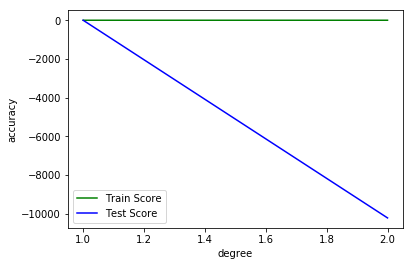

In [ ]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
#SVM with Kernel
from sklearn.svm import SVR
import numpy as np
np.random.seed(0)
parameters = {'kernel': ('rbf','poly'), 'C':[0.01,0.1,1,10,100],'gamma': [0.01,0.1,1,10,100], 'degree' : [1,2]}
svr = SVR()
svr_withkernel = GridSearchCV(svr, parameters, cv = 5, scoring = 'r2')
svr_withkernel.fit(X_train, y_train)
svr_withkernel.score(X_train, y_train)
svr_withkernel_pred_train = svr_withkernel.predict(X_train)
svr_withkernel_pred_test = svr_withkernel.predict(X_test)
report_table = report_table + [['SVRWithKernel', svr_withkernel.best_params_, svr_withkernel.score(X_train, y_train), svr_withkernel.score(X_test, y_test), r2_score(svr_withkernel_pred_train, y_train), r2_score(svr_withkernel_pred_test, y_test)]]
report_table

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravi_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [ ]:
svr_withkernel.score(X_test, y_test)

In [ ]:
svr_withkernel.best_params_

In [ ]:
#Simple SVM without kernel
from sklearn.svm import LinearSVR
parameters = {'C':[0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] }
linearsvr = LinearSVR()
linearsvr_grid = GridSearchCV(linearsvr, parameters, cv = 5, scoring = 'r2')
linearsvr_grid.fit(X_train, y_train)
linearsvr_grid.score(X_train, y_train)
lsr_pred_train = linearsvr_grid.predict(X_train)
lsr_pred_test = linearsvr_grid.predict(X_test)
report_table = report_table + [['LinearSVR', linearsvr_grid.best_params_, linearsvr_grid.score(X_train, y_train), linearsvr_grid.score(X_test, y_test), r2_score(lsr_pred_train, y_train), r2_score(lsr_pred_test, y_test)]]
report_table

In [ ]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train r2 score', 'Test r2 score'])

In [ ]:
report.index = report['Model name']

Based on the test accuracy score and R square score we found Lasso to be the best model with alpha =10 being the best parameter.

In [ ]:

lasso_reg = Lasso(random_state = 0,'alpha': 10)
X = Twitter_df.iloc[ : ,:-1].values.astype(int)
y = Twitter_df[['buzz']]
X_train_unscaled , X_text_unscaled, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_text_unscaled)

lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_train, y_train)
y_predict_test = lasso_reg.predict(X_test)
